**Our objective is to study the data and find the optimal value of k for our k-means algorithm**

First we import all the necessary libraries and modules.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# reading the data
data = pd.read_csv('Iris.csv')
# let us take a look at the data for better understanding of the number of features and type of data we are going to deal with
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# we split the data into X and y or features and labels respectively
X = data.iloc[: , 1:5].values
y = data.iloc[: , 5].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
k_range = range(1, 11)
sse = []
# now we try to find the Sum of Squares Error for different values of k 
for k in k_range:
    k_means_model = KMeans(n_clusters = k)
    k_means_model.fit_predict(X)
    sse.append(k_means_model.inertia_)
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 39.27030268750858,
 34.31265004600874,
 30.001881875582672,
 28.073068877177576,
 26.19169885187276]

Now we try visualising the behaviour of the SSE values we calculated above w.r.t the respective k values through an Elbow Chart

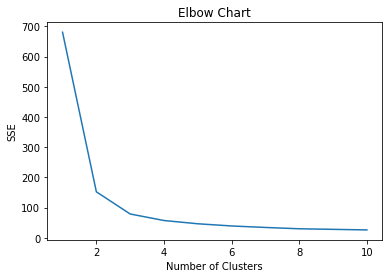

In [7]:
plt.plot(k_range, sse)
plt.title("Elbow Chart")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

we can observe from the above elbow chart that the Elbow is occuring for k = 3. Thus, we select k = 3 as our optimal number of clusters

In [8]:
model = KMeans(n_clusters = 3)
y_pred = model.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Now we try to take a look at how these clusters actually look, so we can plot any two features in the graph, I have chose features 1 and 4 i.e. SepalLengthCm and PetalWidthCm

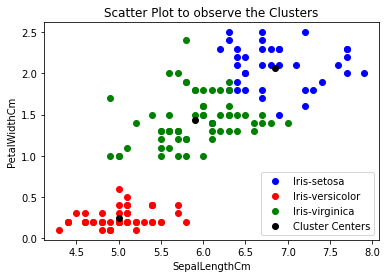

In [16]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 3], c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 3], c = 'red', label = 'Iris-versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 3], c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[: ,0], model.cluster_centers_[: , 3], c = 'black', label = 'Cluster Centers')
plt.title('Scatter Plot to observe the Clusters')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc = 4)

We can see the three clusters denoted with the three colors red, blue and green, we can also see the centroids of each cluster in black